In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud


In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# DROP UNNECESSARY COLUMNS
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Renaming the columns
df.columns = ['labels', 'messages']
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

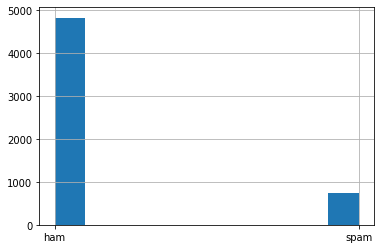

In [10]:
df['labels'].hist()

As we can see from the histogram, we have imbalance class. spam messages are very small in numbers. Hence, we have to consider other metrics such as F1 score and AUC

In [11]:
# CREATE BINARY LABELS
# ham -> 0
# spam -> 1
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['b_labels'] = label_encoder.fit_transform(df['labels'])
df.head()

,labels,messages,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
# Split the dataset
df_train, df_test, Ytrain, Ytest = train_test_split(df['messages'], df['b_labels'], test_size=0.33)

In [21]:
# Try multiple ways of calculating features
# featurizer = TfidfVectorizer(decode_error='ignore')
# Xtrain = featurizer.fit_transform(df_train)
# Xtest = featurizer.transform(df_test)

featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

Xtrain

<3733x7053 sparse matrix of type '<class 'numpy.int64'>'
	with 49359 stored elements in Compressed Sparse Row format>

In [22]:
# Create the model, train and evaluate
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train acc: ", model.score(Xtrain, Ytrain))
print("test acc: ", model.score(Xtest, Ytest))

train acc:  0.9930350924189659
test acc:  0.9902120717781403


In [23]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

print("Train F1: ", f1_score(Ytrain, Ptrain))
print("Test F1: ", f1_score(Ytest, Ptest))

Train F1:  0.974559686888454
Test F1:  0.960352422907489


In [24]:
prob_train = model.predict_proba(Xtrain)[:, 1]
prob_test = model.predict_proba(Xtest)[:, 1]
print("Train AUC: ", roc_auc_score(Ytrain, prob_train))
print("Test AUC: ", roc_auc_score(Ytest, prob_test))

Train AUC:  0.9911801644660896
Test AUC:  0.9896017616342151


In [25]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3209,   10],
       [  16,  498]], dtype=int64)

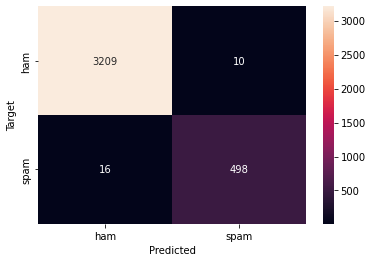

In [27]:
def plot_cm(cm):
    classes = ['ham', 'spam']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    

plot_cm(cm)

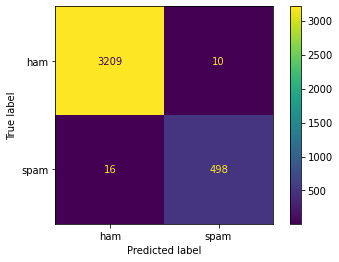

In [32]:
classes = ['ham', 'spam']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classes)
disp.plot()
plt.show()

In [33]:
# Visualize the data
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['messages']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

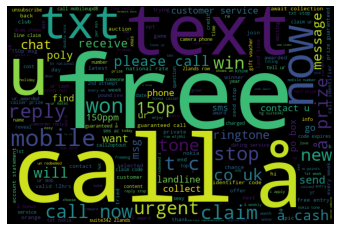

In [37]:
visualize('spam')

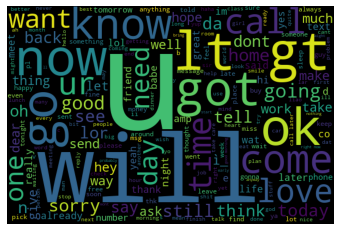

In [36]:
visualize('ham')

In [41]:
# See what the model is getting wrong
X = featurizer.transform(df['messages'])
df['predictions'] = model.predict(X)

In [42]:
# Things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['messages']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Back 2 work 2morro half term over! Can U C me 2nite 4 some sexy passion B4 I have 2 go back? Chat NOW 090997264

In [43]:
# Messages that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['messages']

for msg in not_actually_spam:
    print(msg)

Finally the match heading towards draw as your prediction.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
Anytime...
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
